In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
appointments=pd.read_csv("appointments.csv")
billing=pd.read_csv("billing.csv")
doctors=pd.read_csv("doctors.csv")
patients=pd.read_csv("patients.csv")
treatments=pd.read_csv("treatments.csv")

print("Appointments:\n", appointments.head(), "\n")
print("Billing:\n", billing.head(), "\n")
print("Doctors:\n", doctors.head(), "\n")
print("Patients:\n", patients.head(), "\n")
print("Treatments:\n", treatments.head())

Appointments:
   appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show   

Billing:
   bill_id patient_id treatment_id   bill_date   amount payment_method  \
0    B001       P034         T001  2023-08-09  3941.97      Insurance   
1    B002       P032         T002  2023-06-09  4158.44      Insurance   
2    B003       P048         T003  2023-06-28  3731.55      Insurance   
3    B004       P025         T004  202

In [3]:
appointments['appointment_date'] = pd.to_datetime(appointments['appointment_date'])
billing['bill_date'] = pd.to_datetime(billing['bill_date'])

 
appointments.drop_duplicates(inplace=True)
appointments.dropna(inplace=True)

billing.drop_duplicates(inplace=True)
billing.dropna(inplace=True)

doctors.drop_duplicates(inplace=True)
doctors.dropna(inplace=True)

patients.drop_duplicates(inplace=True)
patients.dropna(inplace=True)

treatments.drop_duplicates(inplace=True)
treatments.dropna(inplace=True)

print("Appointments:", appointments.head())
print("Billing:", billing.head())
print("Doctors:", doctors.head())
print("Patients:", patients.head())
print("Treatments:", treatments.head())

Appointments:   appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  
Billing:   bill_id patient_id treatment_id  bill_date   amount payment_method  \
0    B001       P034         T001 2023-08-09  3941.97      Insurance   
1    B002       P032         T002 2023-06-09  4158.44      Insurance   
2    B003       P048         T003 2023-06-28  3731.55      Insurance   
3    B004       P025         T004 2023-09-01  

In [4]:

merged_df = pd.merge(appointments, patients, on='patient_id', how='inner')


merged_df = pd.merge(merged_df, treatments, on='appointment_id', how='inner')


merged_df = pd.merge(merged_df, billing, on='treatment_id', how='inner')


merged_df = pd.merge(merged_df, doctors, on='doctor_id', how='inner')


print(merged_df.head())

  appointment_id patient_id_x doctor_id appointment_date appointment_time  \
0           A001         P034      D009       2023-08-09         15:15:00   
1           A002         P032      D004       2023-06-09         14:30:00   
2           A003         P048      D004       2023-06-28          8:00:00   
3           A004         P025      D006       2023-09-01          9:15:00   
4           A005         P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status first_name_x last_name_x gender  ...   amount  \
0          Therapy  Scheduled         Alex       Smith      F  ...  3941.97   
1          Therapy    No-show         Alex       Moore      M  ...  4158.44   
2     Consultation  Cancelled        Emily      Miller      M  ...  3731.55   
3     Consultation  Cancelled       Robert      Wilson      M  ...  4799.86   
4        Emergency    No-show        Emily    Williams      M  ...   582.05   

   payment_method payment_status first_name_y last_name_y spec

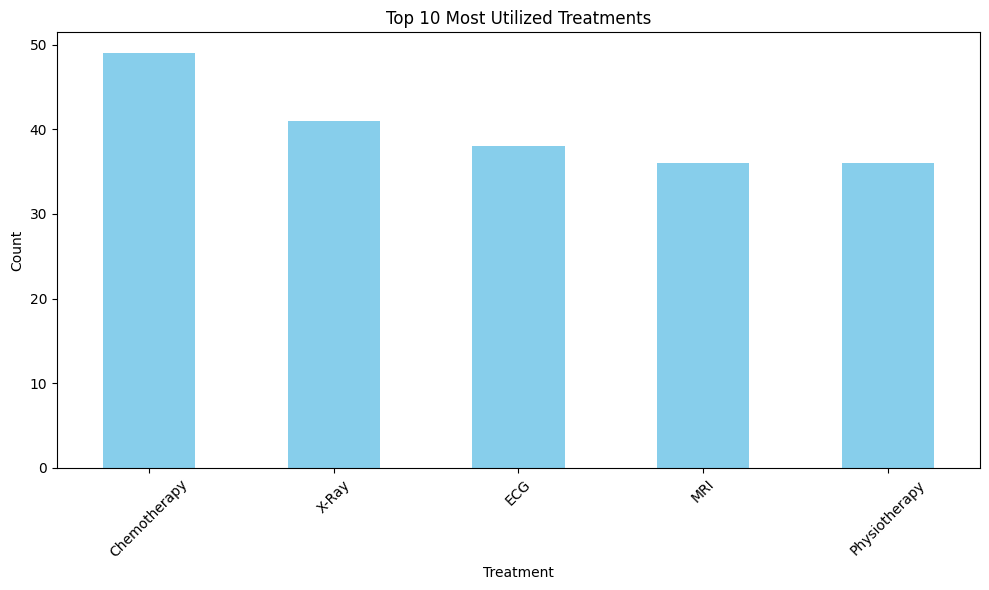

In [5]:
treatment_counts = merged_df['treatment_type'].value_counts().head(10)

plt.figure(figsize=(10,6))
treatment_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Utilized Treatments')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Performing Doctors:
           total_appointments  total_revenue  avg_revenue_per_appointment
doctor_id                                                                
D005                       29       82696.48                  2851.602759
D006                       24       69586.10                  2899.420833
D001                       25       66585.39                  2663.415600
D002                       21       59803.46                  2847.783810
D008                       16       53427.42                  3339.213750


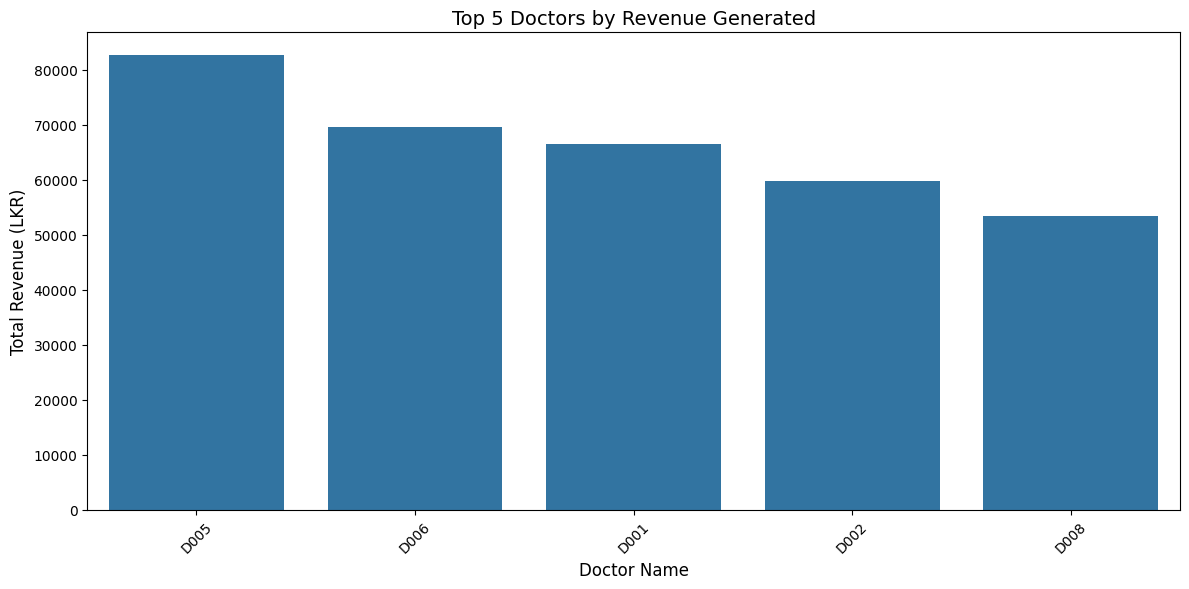

In [6]:
doctor_performance = merged_df.groupby(['doctor_id']).agg(
    total_appointments=('appointment_id', 'count'),
    total_revenue=('amount', 'sum'),
    avg_revenue_per_appointment=('amount', 'mean')
).sort_values('total_revenue', ascending=False)

print("\nTop Performing Doctors:")
print(doctor_performance.head())


plt.figure(figsize=(12,6))
top_doctors = doctor_performance.head(5).reset_index()
sns.barplot(x='doctor_id', y='total_revenue', data=top_doctors)
plt.title('Top 5 Doctors by Revenue Generated', fontsize=14)
plt.xlabel('Doctor Name', fontsize=12)
plt.ylabel('Total Revenue (LKR)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

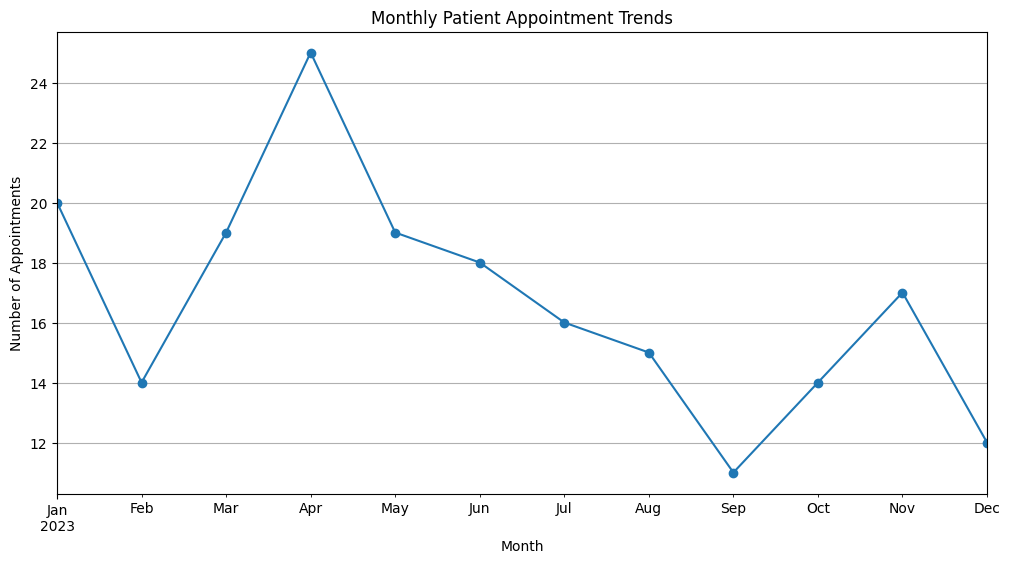

In [7]:
merged_df['appointment_date'] = pd.to_datetime(merged_df['appointment_date'])
daily_trends = merged_df.groupby(merged_df['appointment_date'].dt.date)['appointment_id'].count()
monthly_trends = merged_df.groupby(merged_df['appointment_date'].dt.to_period('M'))['appointment_id'].count()

plt.figure(figsize=(12,6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Patient Appointment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.show()


Patient Behavior Summary:
       total_visits  avg_spend_per_visit
count         200.0           200.000000
mean            1.0          2756.249250
std             0.0          1298.125308
min             1.0           534.030000
25%             1.0          1563.412500
50%             1.0          2828.165000
75%             1.0          3836.627500
max             1.0          4973.630000


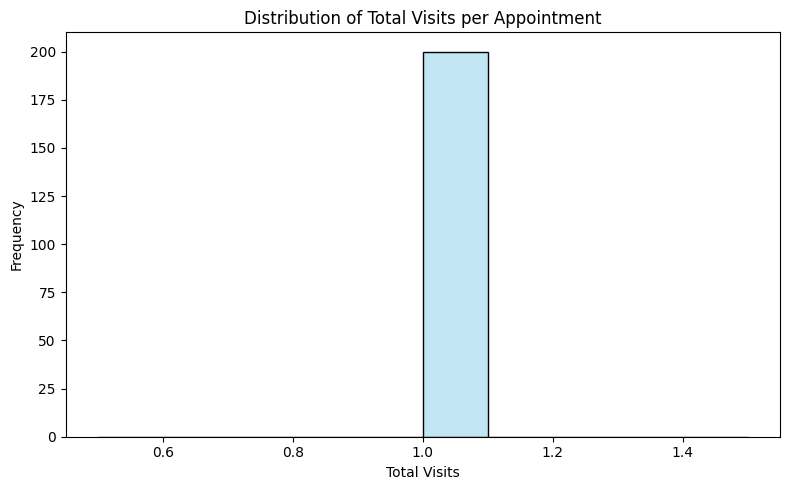

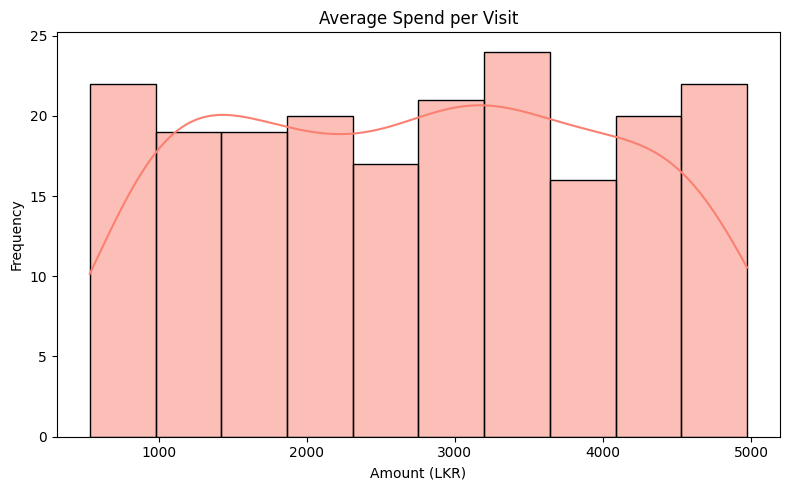

In [8]:
patient_behavior = merged_df.groupby('appointment_id').agg(
    total_visits=('appointment_id', 'count'),
    avg_spend_per_visit=('amount', 'mean'),
    preferred_service=('treatment_type', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
)


print("\nPatient Behavior Summary:")
print(patient_behavior.describe())


plt.figure(figsize=(8, 5))
sns.histplot(patient_behavior['total_visits'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Visits per Appointment')
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(patient_behavior['avg_spend_per_visit'], bins=10, kde=True, color='salmon')
plt.title('Average Spend per Visit')
plt.xlabel('Amount (LKR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

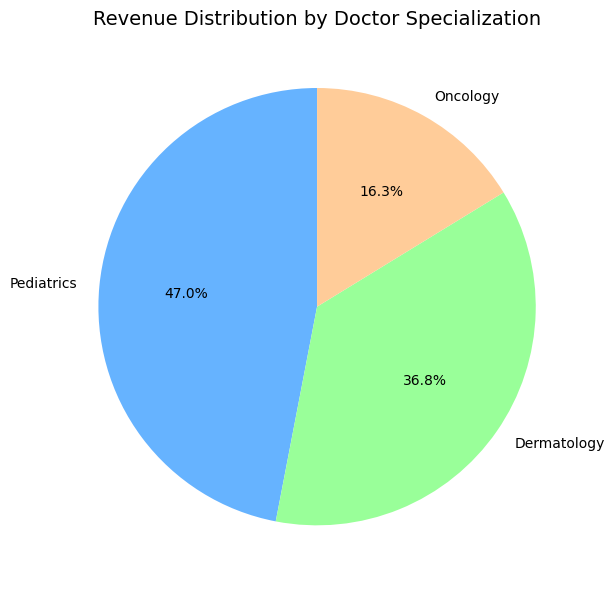

In [9]:
revenue_by_specialization = merged_df.groupby('specialization')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
revenue_by_specialization.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                              colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Revenue Distribution by Doctor Specialization', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

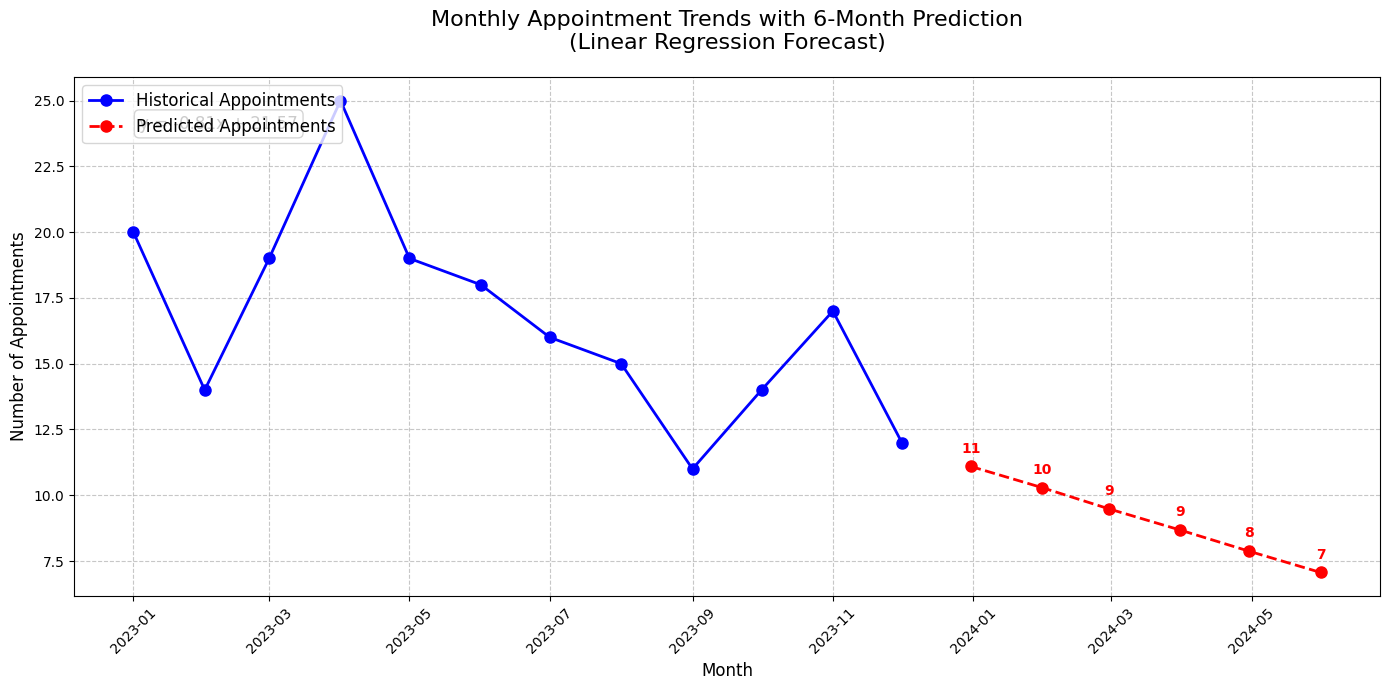


Predicted Appointments for Next 6 Months:
Month 1: Dec 2023 - 11 appointments
Month 2: Jan 2024 - 10 appointments
Month 3: Feb 2024 - 9 appointments
Month 4: Mar 2024 - 9 appointments
Month 5: Apr 2024 - 8 appointments
Month 6: May 2024 - 7 appointments


In [10]:
# 1. Prepare time series data
monthly_data = merged_df.groupby(merged_df['appointment_date'].dt.to_period('M'))['appointment_id'].count().reset_index()
monthly_data['appointment_date'] = monthly_data['appointment_date'].astype(str)
monthly_data['month_num'] = range(1, len(monthly_data)+1)

# 2. Linear Regression model
X = monthly_data[['month_num']]
y = monthly_data['appointment_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict next 6 months
future_months = pd.DataFrame({'month_num': range(len(monthly_data)+1, len(monthly_data)+7)})
future_predictions = model.predict(future_months)

# 3. Create visualization
plt.figure(figsize=(14, 7))

# Convert period dates to datetime for plotting
monthly_data['plot_date'] = pd.to_datetime(monthly_data['appointment_date'])
future_dates = pd.date_range(start=monthly_data['plot_date'].iloc[-1] + pd.offsets.MonthEnd(1), 
                           periods=6, freq='ME')

# Plot historical data
plt.plot(monthly_data['plot_date'], 
        monthly_data['appointment_id'], 
        'bo-', 
        label='Historical Appointments',
        markersize=8,
        linewidth=2)

# Plot predictions
plt.plot(future_dates, 
        future_predictions, 
        'r--', 
        label='Predicted Appointments',
        linewidth=2,
        marker='o',
        markersize=8)

# Formatting
plt.title('Monthly Appointment Trends with 6-Month Prediction\n(Linear Regression Forecast)', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels
for x, y in zip(future_dates, future_predictions):
    plt.annotate(f'{y:.0f}', 
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=10,
                color='red',
                weight='bold')

# Add trend line equation to plot
trend_eq = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.annotate(trend_eq, 
             xy=(0.05, 0.9), 
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print numerical predictions
print("\nPredicted Appointments for Next 6 Months:")
for i, (date, pred) in enumerate(zip(future_dates, future_predictions), 1):
    print(f"Month {i}: {date.strftime('%b %Y')} - {pred:.0f} appointments")